In [3]:
import random

import cv2
from matplotlib import pyplot as plt

import albumentations as A

In [65]:
BOX_COLOR = (255, 0, 0) # Red
TEXT_COLOR = (255, 255, 255) # White


def visualize_bbox(img, bbox, class_name, width, height, color=BOX_COLOR, thickness=2):
    dataType = "yolo"
    """Visualizes a single bounding box on the image"""

    if dataType == 'coco':
        x_min, y_min, w, h = bbox
        
        x_min, x_max, y_min, y_max = int(x_min), int(x_min + w), int(y_min), int(y_min + h)

    elif dataType =='yolo':
        x_center, y_center, w, h = bbox
        # 정규화된 값 0~1사이의 값
        # 픽셀 좌표로 변환 이미지의 width와 height값을 곱해주면 된다.
        x_min = int((x_center - (w/2))*width)
        x_max = int((x_center + (w/2))*width)
        y_min = int((y_center - (h/2))*height)
        y_max = int((y_center + (h/2))*height)
    print(x_min, x_max, y_min,y_max)
    cv2.rectangle(img, (x_min, y_min), (x_max, y_max), color=color, thickness=thickness)

    ((text_width, text_height), _) = cv2.getTextSize(class_name, cv2.FONT_HERSHEY_SIMPLEX, 0.35, 1)
    cv2.rectangle(img, (x_min, y_min - int(1.3 * text_height)), (x_min + text_width, y_min), BOX_COLOR, -1)
    cv2.putText(
        img,
        text=class_name,
        org=(x_min, y_min - int(0.3 * text_height)),
        fontFace=cv2.FONT_HERSHEY_SIMPLEX,
        fontScale=0.35,
        color=TEXT_COLOR,
        lineType=cv2.LINE_AA,
    )
    return img


def visualize(image, bboxes, category_ids, category_id_to_name, img_shape):
    img = image.copy()
    h, w = img_shape
    for bbox, category_id in zip(bboxes, category_ids):
        class_name = category_id_to_name[category_id]
        img = visualize_bbox(img, bbox, class_name, w, h)
    plt.figure(figsize=(12, 12))
    plt.axis('off')
    plt.imshow(img)

In [71]:
image = cv2.imread('images/000000386298.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
img_shape = image.shape[0:2]
img_shape

(375, 500)

In [67]:
# yolo에서는 2개를 txt파일에서 읽어와서 만들어준다.
# bboxes = [[5.66, 138.95, 147.09, 164.88], [366.7, 80.84, 132.8, 181.84]]
# category_ids = [17, 18]

# We will use the mapping from category_id to the class name
# to visualize the class label for the bounding box on the image
category_id_to_name = {0: 'cat', 1: 'dog'}

In [68]:
category_ids = []
bboxes = []

f=open('images/000000386298.txt','r')
while True:
    line = f.readline()
    if not line: break
    ids, xc, yc, w, h= line.split(' ')
    category_ids.append(int(ids))
    bboxes.append([float(xc),float(yc),float(w),float(h)])
    print(line)
f.close()

0 0.151059 0.598563 0.288740 0.433265

1 0.870123 0.443532 0.250836 0.509240



In [69]:
print(category_ids)
print(bboxes)

[0, 1]
[[0.151059, 0.598563, 0.28874, 0.433265], [0.870123, 0.443532, 0.250836, 0.50924]]


3 147 143 305
372 497 70 261


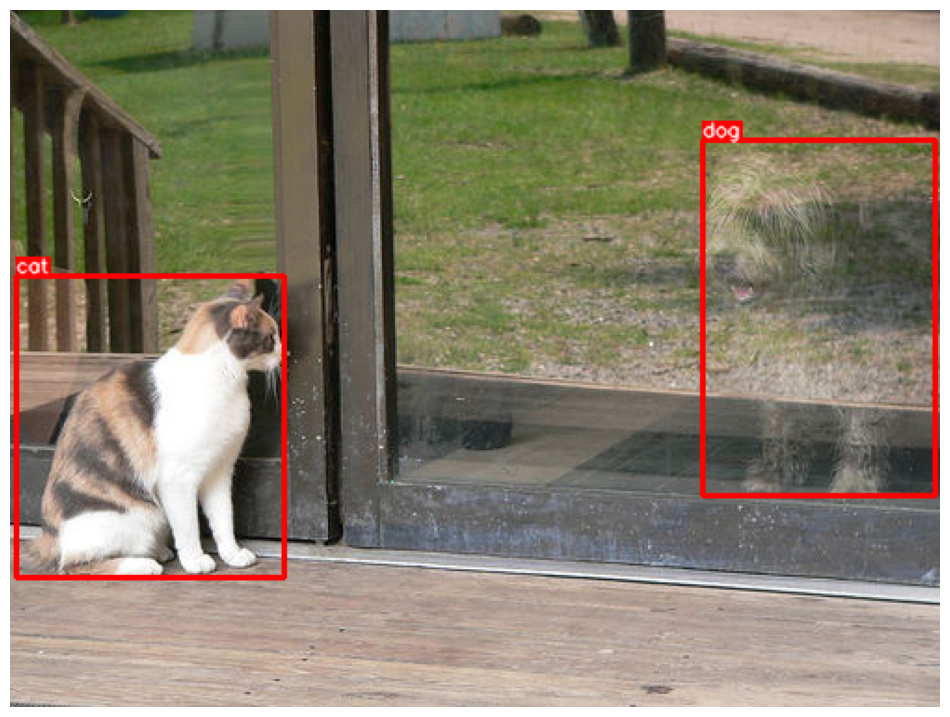

In [70]:
visualize(image, bboxes, category_ids, category_id_to_name, img_shape)

In [72]:
transform = A.Compose(
    [A.HorizontalFlip(p=0.5)],
    bbox_params=A.BboxParams(format='yolo', label_fields=['category_ids']),
)

352 496 143 305
2 127 70 261


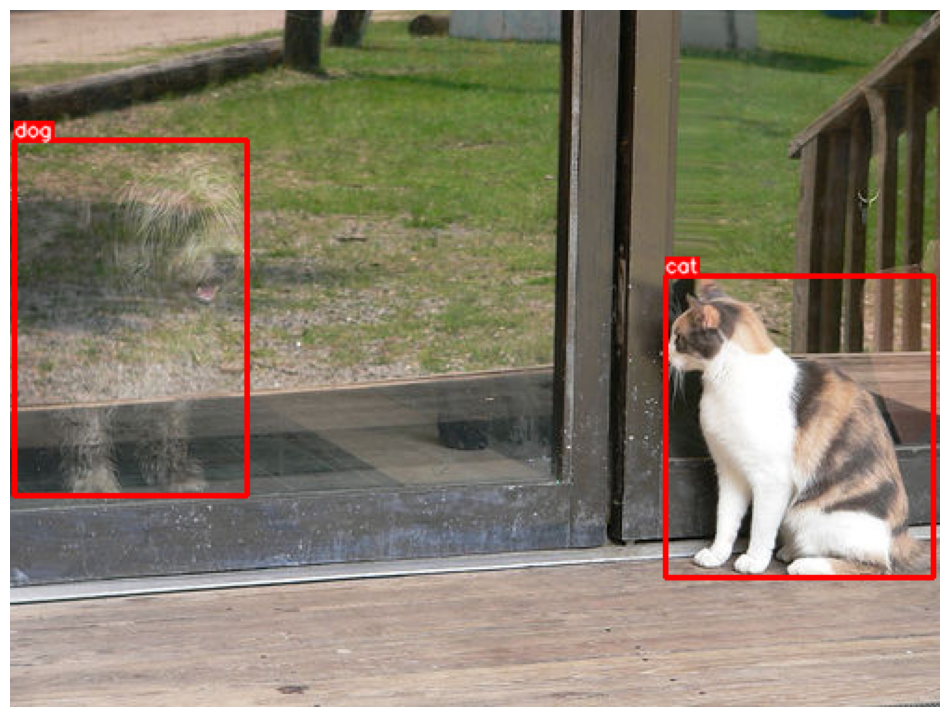

In [75]:
random.seed(7)
transformed = transform(image=image, bboxes=bboxes, category_ids=category_ids)
visualize(
    transformed['image'],
    transformed['bboxes'],
    transformed['category_ids'],
    category_id_to_name,
    img_shape
)